In [3]:
import tensorflow as tf 
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 


In [9]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS= 3


In [10]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)




Found 2152 files belonging to 3 classes.


In [11]:
class_name= dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [12]:
len(dataset)

68

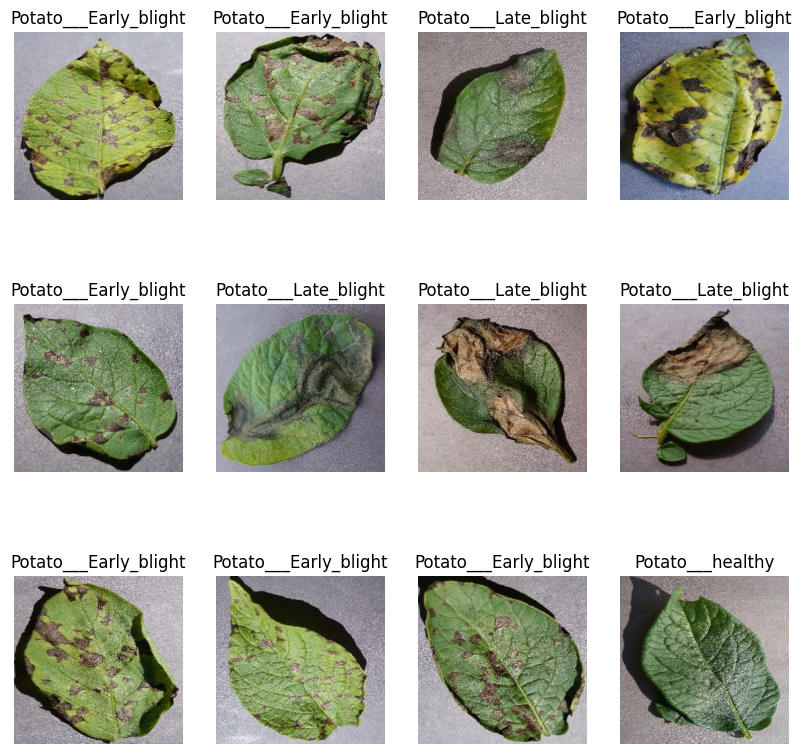

In [24]:
plt.figure(figsize=(10, 10))
for image_batch, lable_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[lable_batch[i]])
        plt.axis("off")
    

In [25]:
len(dataset)

68